In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
import graphviz
from graphviz import Source
 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import export_graphviz
import sklearn.metrics as met
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [2]:
rushing = pd.read_csv("2018_NFL_Rushing_Stats.csv")
rushing = rushing.drop(columns=['Rk', 'Player'])
rushing.head()

,Tm,Age,Pos,G,GS,Att,Yds,TD,Lng,Y/A,Y/G,Fmb
0,DAL,23,RB,15,15,304,1434,6,41,4.7,95.6,6
1,NYG,21,RB,16,16,261,1307,11,78,5.0,81.7,0
2,ARI,27,RB,16,16,258,940,7,53,3.6,58.8,3
3,LAR,24,RB,14,14,256,1251,17,36,4.9,89.4,1
4,WAS,33,RB,16,16,251,1042,7,90,4.2,65.1,3


In [3]:
rushing = pd.get_dummies(rushing, columns = ["Tm", "Pos"], drop_first = True)
rushing.head()

,Age,G,GS,Att,Yds,TD,Lng,Y/A,Y/G,Fmb,...,Pos_QB,Pos_QB/WR,Pos_RB,Pos_RB/TE,Pos_RB/WR,Pos_S,Pos_TE,Pos_TE/WR,Pos_WR,Pos_WR/RB
0,23,15,15,304,1434,6,41,4.7,95.6,6,...,0,0,1,0,0,0,0,0,0,0
1,21,16,16,261,1307,11,78,5.0,81.7,0,...,0,0,1,0,0,0,0,0,0,0
2,27,16,16,258,940,7,53,3.6,58.8,3,...,0,0,1,0,0,0,0,0,0,0
3,24,14,14,256,1251,17,36,4.9,89.4,1,...,0,0,1,0,0,0,0,0,0,0
4,33,16,16,251,1042,7,90,4.2,65.1,3,...,0,0,1,0,0,0,0,0,0,0


In [4]:
X = rushing.drop(columns = "Yds")
X.head()

,Age,G,GS,Att,TD,Lng,Y/A,Y/G,Fmb,Tm_ARI,...,Pos_QB,Pos_QB/WR,Pos_RB,Pos_RB/TE,Pos_RB/WR,Pos_S,Pos_TE,Pos_TE/WR,Pos_WR,Pos_WR/RB
0,23,15,15,304,6,41,4.7,95.6,6,0,...,0,0,1,0,0,0,0,0,0,0
1,21,16,16,261,11,78,5.0,81.7,0,0,...,0,0,1,0,0,0,0,0,0,0
2,27,16,16,258,7,53,3.6,58.8,3,1,...,0,0,1,0,0,0,0,0,0,0
3,24,14,14,256,17,36,4.9,89.4,1,0,...,0,0,1,0,0,0,0,0,0,0
4,33,16,16,251,7,90,4.2,65.1,3,0,...,0,0,1,0,0,0,0,0,0,0


In [5]:
y = rushing["Yds"]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [7]:
knn = KNeighborsRegressor(n_neighbors = 3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [8]:
((y_test - y_pred)**2).mean()

2825.6070853462156

Text(0, 0.5, 'Predicted Yards')

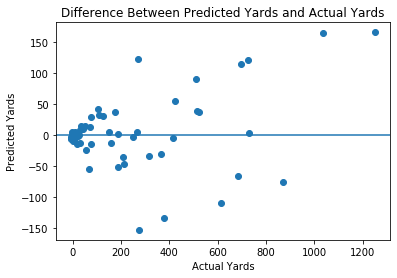

In [9]:
plt.scatter( x = y_test, y = y_test - y_pred)
plt.axhline()
plt.title("Difference Between Predicted Yards and Actual Yards")
plt.xlabel("Actual Yards")
plt.ylabel("Predicted Yards")